## Python wrapper for nni restful APIs

nni provides nnicli module as a python wrapper for its restful APIs, which can be used to retrieve nni experiment and trial job information in your python code. This notebook shows how to use nnicli module.

For a full nnicli API reference, please refer to [this documentation](https://nni.readthedocs.io/en/latest/nnicli_ref.html).

### Start nni experiment using specified configuration file
Let's use a configruation file in nni examples directory to start an experiment. Make sure you have installed nni, seaborn and pytorch in your environment.

In [2]:
! cat ../trials/mnist-pytorch/config.yml

authorName: default
experimentName: example_mnist_pytorch
trialConcurrency: 1
maxExecDuration: 1h
maxTrialNum: 10
#choice: local, remote, pai
trainingServicePlatform: local
searchSpacePath: search_space.json
#choice: true, false
useAnnotation: false
tuner:
  #choice: TPE, Random, Anneal, Evolution, BatchTuner, MetisTuner, GPTuner
  #SMAC (SMAC should be installed through nnictl)
  builtinTunerName: TPE
  classArgs:
    #choice: maximize, minimize
    optimize_mode: maximize
trial:
  command: python3 mnist.py
  codeDir: .
  gpuNum: 0


In [2]:
from nnicli import Experiment
exp = Experiment()
exp.start_experiment(config_file='../trials/mnist-pytorch/config.yml')

INFO:  expand searchSpacePath: search_space.json to /home/xxx/nni/examples/trials/mnist-pytorch/search_space.json
INFO:  expand codeDir: . to /home/xxx/nni/examples/trials/mnist-pytorch/.
INFO:  Starting restful server...
INFO:  Successfully started Restful server!
INFO:  Setting local config...
INFO:  Successfully set local config!
INFO:  Starting experiment...
INFO:  Successfully started experiment!
------------------------------------------------------------------------------------
The experiment id is OhHNEkLQ
The Web UI urls are: http://127.0.0.1:8080   http://xxx.xxx.xxx.xxx:8080   http://172.17.0.1:8080
------------------------------------------------------------------------------------

You can use these commands to get more information about the experiment
------------------------------------------------------------------------------------
commands                       description
1. nnictl experiment show        show the information of experiments
2. nnictl trial ls         

### Retrieve nni experiment and trial job information

In [4]:
exp.get_experiment_status()

{'status': 'DONE', 'errors': []}

In [5]:
exp.get_job_statistics()

[{'trialJobStatus': 'SUCCEEDED', 'trialJobNumber': 10}]

In [6]:
exp.get_experiment_profile()

{'id': 'OhHNEkLQ',
 'revision': 181,
 'execDuration': 1680,
 'logDir': '/home/xxx/nni-experiments/OhHNEkLQ',
 'nextSequenceId': 11,
 'params': {'authorName': 'default',
  'experimentName': 'example_mnist_pytorch',
  'trialConcurrency': 1,
  'maxExecDuration': 3600,
  'maxTrialNum': 10,
  'searchSpace': '{"batch_size": {"_type": "choice", "_value": [16, 32, 64, 128]}, "hidden_size": {"_type": "choice", "_value": [128, 256, 512, 1024]}, "lr": {"_type": "choice", "_value": [0.0001, 0.001, 0.01, 0.1]}, "momentum": {"_type": "uniform", "_value": [0, 1]}}',
  'trainingServicePlatform': 'local',
  'tuner': {'builtinTunerName': 'TPE',
   'classArgs': {'optimize_mode': 'maximize'},
   'checkpointDir': '/home/xxx/nni-experiments/OhHNEkLQ/checkpoint'},
  'versionCheck': True,
  'clusterMetaData': [{'key': 'codeDir',
    'value': '/home/xxx/nni/examples/trials/mnist-pytorch/.'},
   {'key': 'command', 'value': 'python3 mnist.py'}]},
 'startTime': 1597942817897,
 'endTime': 1597944680966}

In [7]:
exp.list_trial_jobs()

[TrialJob(trialJobId: PTWOZ status: SUCCEEDED hyperParameters: [TrialHyperParameters(parameter_id: 0 parameter_source: algorithm parameters: {'batch_size': 32, 'hidden_size': 1024, 'lr': 0.1, 'momentum': 0.1922378994556755} parameter_index: 0)] logPath: file://localhost:/home/xxx/nni-experiments/OhHNEkLQ/trials/PTWOZ startTime: 1597942828086 endTime: 1597943039314 finalMetricData: [TrialMetricData(timestamp: 1597943031202 trialJobId: PTWOZ parameterId: 0 type: FINAL sequence: 0 data: 99.36)] stderrPath: None),
 TrialJob(trialJobId: InH3J status: SUCCEEDED hyperParameters: [TrialHyperParameters(parameter_id: 1 parameter_source: algorithm parameters: {'batch_size': 16, 'hidden_size': 256, 'lr': 0.1, 'momentum': 0.8122758606731078} parameter_index: 0)] logPath: file://localhost:/home/xxx/nni-experiments/OhHNEkLQ/trials/InH3J startTime: 1597943053122 endTime: 1597943249425 finalMetricData: [TrialMetricData(timestamp: 1597943249044 trialJobId: InH3J parameterId: 1 type: FINAL sequence: 0 da

### Visualizing nni experiment result

With the retrieved trial job information, we can do some analysis by visualizing the metric data, below is a simple example.

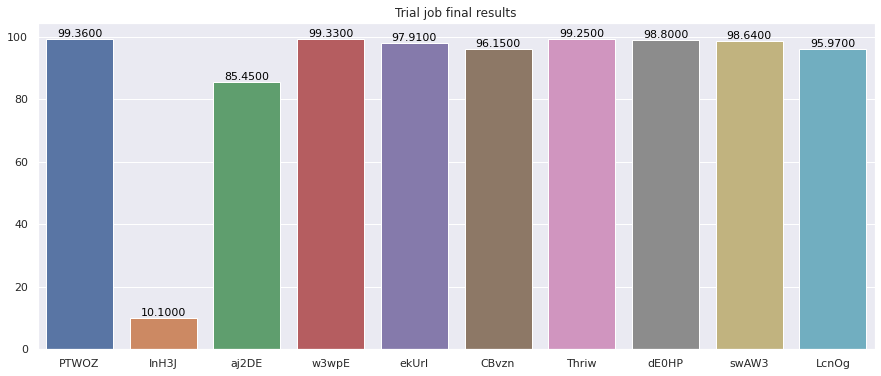

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

jobs = exp.list_trial_jobs()
job_ids = [x.trialJobId for x in jobs]
final_metrics = [float(x.finalMetricData[0].data) for x in jobs]

data = {'job id': job_ids, 'final metrics': final_metrics}
sns.set(rc={'figure.figsize':(15, 6)})

plt.title('Trial job final results')
ax = sns.barplot(x='job id', y='final metrics', data=data) 

for i,p in enumerate(ax.patches):
    ax.annotate('{:.4f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 5),
                 textcoords='offset points') 

### Stop nni experiment

In [10]:
exp.stop_experiment()

INFO:  Stopping experiment OhHNEkLQ
INFO:  Stop experiment success.
